0: Orchestra Baobab
1: Tamikrest
2: Kizz Daniel
3: CKay
4: KiDi
5: Sauti Sol
6: Cesária Evora
7: Olakira
8: Yasmine
9: Bonga
10: Toofan
11: Fireboy Dml
12: Kpro
13: Arrow Bwoy
14: Gemini Major
15: Nelson Freitas
16: Poirier
17: Harmonik
18: Seyi Shay
19: Voilaaa
20: Simi
21: Karl Hector & The Malcouns
22: Kaysha
23: Calo Pascoal
24: Blaqbonez
25: Bruce Melodie
26: Ivan Alekxei
27: Cheque
28: Patoranking
29: Boubacar Traoré
30: Reekado Banks
31: Midas the Jagaban
32: Zlatan
33: Joeboy
34: Badoxa
35: Ridge
36: Gerilson Insrael
37: 2baba
38: Africando
39: Adekunle Gold
40: DopeNation
41: Martin Garrix
42: Alan Walker
43: Dimitri Vegas
44: Like Mike
45: Sophia Somajo
46: Von Mondo
47: Stardust
48: John Summit
49: Mike Candys
50: Afro Bros
51: Pascal Letoublon
52: Evelyn
53: Galimatias
54: Robert Miles
55: Emre Kabak
56: Jack Back
57: One-T
58: Nathan Nicholson
59: Blinders
60: Clinton Kane
61: Route 94
62: FTampa
63: Twelve
64: Slushii
65: Sorana
66: Sonny Fodera
67: Camden Cox
68: Bastard

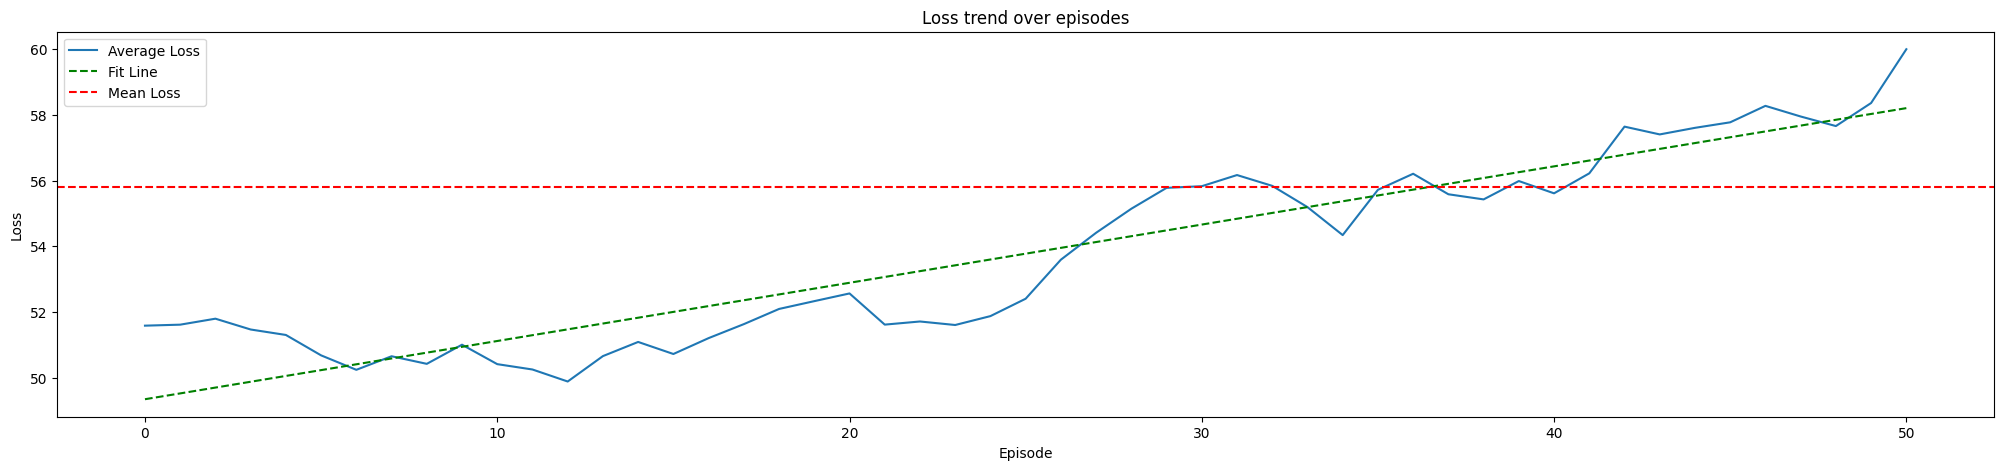

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image, Audio, clear_output
import ipywidgets as widgets

def music_feedback_interface(image_url, sound_source, artist, song, duration, explicit_lyrics, callback):
    like_button = widgets.Button(description='Like', button_style='success')
    dislike_button = widgets.Button(description='Dislike', button_style='danger')

    display(widgets.HTML(f"<h2>{artist} - {song}</h2>"))
    display(widgets.HTML(f"<p>Duration: {duration} seconds</p>"))
    display(widgets.HTML(f"<p>Explicit Lyrics: {'Yes' if explicit_lyrics else 'No'}</p>"))
    display(Image(url=image_url, format='png', width=300, height=300))
    display(widgets.HBox([like_button, dislike_button]))

    def on_button_click(b):
        feedback = 1 if b.description == 'Like' else 0
        clear_output()
        callback(feedback, artist)

    like_button.on_click(on_button_click)
    dislike_button.on_click(on_button_click)

    display(Audio(url=sound_source, autoplay=True))

class QLearningAgent:
    def __init__(self, num_actions, num_states, learning_rate=0.1, discount_factor=0.9, exploration_prob=0.1, last_state="x"):
        self.num_actions = num_actions
        self.num_states = num_states
        self.q_table = np.zeros((num_states, num_actions))
        self.learning_rate = learning_rate
        self.discount_factor = discount_factor
        self.exploration_prob = exploration_prob
        self.last_state = last_state
        self.states = {}
        self.losses = []

    def select_action(self, state):
        if np.random.rand() < self.exploration_prob:
            return np.random.choice(self.num_actions)
        else:
            return np.argmax(self.q_table[state, :])

    @staticmethod
    def load_data(file_path):
        return pd.read_csv(file_path)

    @staticmethod
    def preprocess_data(data):
        data = data.fillna(0)
        return data

    @staticmethod
    def state_representation(row):
        state_str = f"{row['GenreID']}_{row['ArtistID']}_{row['TrackID']}"
        hashed_state = hash(state_str) % 10000
        return hashed_state

    def simulate_recommendation_system(self, data, user_artist, user_genre, min_danceability, max_danceability, num_episodes=100):
        for episode in range(num_episodes):
            print(f"Episode number: {episode}")
            episode_loss = 0

            for _, row in data.iterrows():
                if (row['ArtistName'] != user_artist or
                    row['track_genre'] != user_genre or
                    not (min_danceability <= row['danceability'] <= max_danceability)):
                    continue
                state = self.state_representation(row)
                self.states[state] = row
                action = self.select_action(state)
                reward = self.simulate_user_response(row, user_artist)
                next_state = self.state_representation(row)
                loss = self.update_q_table(state, action, reward, next_state)
                episode_loss += loss

            self.losses.append(episode_loss)

        self.last_state = row

        window_size = 50
        avg_losses = np.convolve(self.losses, np.ones(window_size), 'valid') / window_size

        coeffs = np.polyfit(range(len(avg_losses)), avg_losses, 1)
        fit_line = coeffs[0] * np.array(range(len(avg_losses))) + coeffs[1]
        mean_loss = np.mean(self.losses)

        # plt.figure(figsize=(25, 5))
        # plt.plot(avg_losses, label='Average Loss')
        # plt.plot(fit_line, color='g', linestyle='--', label='Fit Line')
        # plt.axhline(mean_loss, color='r', linestyle='--', label='Mean Loss')
        # plt.xlabel('Episode')
        # plt.ylabel('Loss')
        # plt.title('Loss trend over episodes')
        # plt.legend()
        # plt.show()

    def get_action(self):
        return self.last_state

    def recommend_music(self, data):
        state = self.state_representation(data.sample(n=1).iloc[0])
        action = np.argmax(self.q_table[state, :])
        recommended_data_row = data.iloc[action]

        return {
            'ImageLink': recommended_data_row['ImageLink'],
            'Preview': recommended_data_row['Preview'],
            'Title': recommended_data_row['Title'],
            'ArtistName': recommended_data_row['ArtistName'],
            'GenreID': recommended_data_row['GenreID'],
        }

    def simulate_user_response(self, row, user_artist):
        return 1 if row['ArtistName'] == user_artist else 0

    def update_q_table(self, state, action, reward, next_state):
        best_next_action = np.argmax(self.q_table[next_state, :])
        current_q = self.q_table[state, action]
        target_q = reward + self.discount_factor * self.q_table[next_state, best_next_action]
        loss = (target_q - current_q) ** 2
        self.q_table[state, action] += self.learning_rate * (target_q - current_q)
        return loss

# Load and preprocess the data
file_path = "/content/artists_output_with_top_tracks.csv"
music_data = QLearningAgent.load_data(file_path)
music_data = QLearningAgent.preprocess_data(music_data)

# List unique artists for user selection
unique_artists = music_data['ArtistName'].unique()
for i, artist in enumerate(unique_artists):
    print(f"{i}: {artist}")

artist_number = int(input("Enter the number corresponding to your preferred artist: "))
user_artist = unique_artists[artist_number]

# List unique genres for user selection
unique_genres = music_data['track_genre'].unique()
for i, genre in enumerate(unique_genres):
    print(f"{i}: {genre}")

genre_number = int(input("Enter the number corresponding to your preferred genre: "))
user_genre = unique_genres[genre_number]

# Ask user for danceability range
min_danceability = float(input("Enter the minimum danceability (0 to 1): "))
max_danceability = float(input("Enter the maximum danceability (0 to 1): "))
danceability_range = (min_danceability, max_danceability)

# Initialize QLearningAgent
ql_agent = QLearningAgent(num_actions=2, num_states=10000)

# Simulate the recommendation system
ql_agent.simulate_recommendation_system(
    music_data,
    user_artist=user_artist,
    user_genre=user_genre,
    min_danceability=min_danceability,
    max_danceability=max_danceability,
    num_episodes=100
)

# Plotting the loss trend
if len(ql_agent.losses) > 0:
    window_size = 50
    avg_losses = np.convolve(ql_agent.losses, np.ones(window_size), 'valid') / window_size
    print(avg_losses)

    coeffs = np.polyfit(range(len(avg_losses)), avg_losses, 1)
    fit_line = coeffs[0] * np.array(range(len(avg_losses))) + coeffs[1]
    mean_loss = np.mean(ql_agent.losses)

    plt.figure(figsize=(25, 5))
    plt.plot(avg_losses, label='Average Loss')
    plt.plot(fit_line, color='g', linestyle='--', label='Fit Line')
    plt.axhline(mean_loss, color='r', linestyle='--', label='Mean Loss')
    plt.xlabel('Episode')
    plt.ylabel('Loss')
    plt.title('Loss trend over episodes')
    plt.legend()
    plt.show()
else:
    print("No losses recorded. Please check the simulation process.")


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, Image, Audio, clear_output
import ipywidgets as widgets

def recommend_song(agent, data, exclude_indices, artist=None, genre=None, danceability_range=None):
    max_q_value = -float('inf')
    max_q_value_index = None

    for i, row in data.iterrows():
        if i in exclude_indices:
            continue
        if artist is not None and row["ArtistName"] != artist:
            continue
        if genre is not None and row["track_genre"] != genre:
            continue
        if danceability_range is not None:
            if not (danceability_range[0] <= row["danceability"] <= danceability_range[1]):
                continue
        state = agent.state_representation(row)
        q_values = agent.q_table[state, :]
        if q_values[1] > max_q_value:
            max_q_value = q_values[1]
            max_q_value_index = i
    return max_q_value_index, data.iloc[max_q_value_index] if max_q_value_index is not None else None

def suggest_song(agent, data, artist, genre, danceability_range):
    exclude_indices = set()

    def show_next_song(feedback, artist):
        nonlocal exclude_indices
        if feedback == 0:
            exclude_indices.add(current_index)
            next_index, recommended_song = recommend_song(agent, data, exclude_indices, artist, genre, danceability_range)
            if next_index is None:
                print("No more songs to recommend.")
            else:
                display_next_song(next_index, recommended_song)
        else:
            print("You liked the song!")

    def display_next_song(index, song):
        nonlocal current_index
        current_index = index
        image_url = song["ImageLink"]
        sound_source = song["Preview"]
        artist = song["ArtistName"]
        song_title = song["Title"]
        duration = song["Duration"]
        explicit_lyrics = song["ExplicitLyrics"]
        music_feedback_interface(image_url, sound_source, artist, song_title, duration, explicit_lyrics, show_next_song)

    current_index, recommended_song = recommend_song(agent, data, exclude_indices, artist, genre, danceability_range)
    if recommended_song is not None:
        display_next_song(current_index, recommended_song)
    else:
        print("No songs to recommend.")


# Create Q-learning agent and start song recommendation
ql_agent = QLearningAgent(num_actions=2, num_states=10000)
suggest_song(ql_agent, music_data, user_artist, user_genre, danceability_range)


HTML(value='<h2>2Pac - Changes</h2>')

HTML(value='<p>Duration: 268 seconds</p>')

HTML(value='<p>Explicit Lyrics: Yes</p>')